In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("src/")
from src.transport_model import TransportModel, get_data_loaders, get_model_inputs, ELECTRON_ONLY_TOPOLOGY
from src.db_handler import DB_handler
import os
import torch
from src.constants import *
import matplotlib.pyplot as plt

In [29]:
db = DB_handler("data/db6june.feather")
norms = db.get_norm_parameters(NORM_ZSCORE)
train_dataloader, test_dataloader = get_data_loaders(db, batch_size=512, test_size=0.1)

In [14]:
validation_base = np.arange(0, 40, 4)
def benchmark_model(model):
    train_loss = []
    validation_loss = []
    for epoch in range(40):
        epoch_loss = model.train_epoch(train_dataloader, True)
        train_loss.append(epoch_loss)
        print(f"\rEpoch {epoch+1} mean loss: {epoch_loss.mean():<25.4f}")
        if epoch % 4 == 0:
            epoch_validation_loss = model.validate(test_dataloader)
            validation_loss.append(epoch_validation_loss)
            print(f"\rValidation loss: {epoch_validation_loss.mean():.4f}, median loss: {np.median(epoch_validation_loss):.4f}")
    final_validation = model.validate(test_dataloader)
    return np.array(final_validation), np.array(train_loss), np.array(validation_loss)

In [5]:
model_size1 = TransportModel(topology=[20,64,2])
model_size1.set_norm(norms)
final_validation_size1, t_loss_size1, v_loss_size1 = benchmark_model(model_size1)

Epoch 1 mean loss: 0.7247                   
Validation loss: 0.6571, median loss: 0.4593
Epoch 2 mean loss: 0.6411                   
Epoch 3 mean loss: 0.6234                   
Epoch 4 mean loss: 0.6134                   
Epoch 5 mean loss: 0.6069                   
Validation loss: 0.6055, median loss: 0.3995
Epoch 6 mean loss: 0.6026                   
Epoch 7 mean loss: 0.5994                   
Epoch 8 mean loss: 0.5970                   
Epoch 9 mean loss: 0.5950                   
Validation loss: 0.5963, median loss: 0.3918
Epoch 10 mean loss: 0.5933                   
Epoch 11 mean loss: 0.5916                   
Epoch 12 mean loss: 0.5901                   
Epoch 13 mean loss: 0.5889                   
Validation loss: 0.5894, median loss: 0.3823
Epoch 14 mean loss: 0.5877                   
Epoch 15 mean loss: 0.5866                   
Epoch 16 mean loss: 0.5854                   
Epoch 17 mean loss: 0.5844                   
Validation loss: 0.5852, median loss: 0.3767
Ep

In [13]:
print(np.mean(final_validation_size1).mean())
print(np.array(t_loss_size1).mean(axis=1)[-1])
plt.plot(np.array(t_loss_size1).mean(axis=1))
plt.plot(validation_base, np.array(v_loss_size1).mean(axis=1))

0.5744273245630074
0.5715462250295174


In [16]:
model_size2 = TransportModel(topology=[20,64,64,2])
model_size2.set_norm(norms)
final_validation_size2, t_loss_size2, v_loss_size2 = benchmark_model(model_size2)

Epoch 1 mean loss: 0.6485                   
Validation loss: 0.5751, median loss: 0.3540
Epoch 2 mean loss: 0.5532                   
Epoch 3 mean loss: 0.5267                   
Epoch 4 mean loss: 0.5103                   
Epoch 5 mean loss: 0.4982                   
Validation loss: 0.4932, median loss: 0.2762
Epoch 6 mean loss: 0.4892                   
Epoch 7 mean loss: 0.4824                   
Epoch 8 mean loss: 0.4769                   
Epoch 9 mean loss: 0.4723                   
Validation loss: 0.4717, median loss: 0.2557
Epoch 10 mean loss: 0.4686                   
Epoch 11 mean loss: 0.4654                   
Epoch 12 mean loss: 0.4625                   
Epoch 13 mean loss: 0.4601                   
Validation loss: 0.4605, median loss: 0.2477
Epoch 14 mean loss: 0.4580                   
Epoch 15 mean loss: 0.4559                   
Epoch 16 mean loss: 0.4542                   
Epoch 17 mean loss: 0.4526                   
Validation loss: 0.4536, median loss: 0.2403
Ep

In [17]:
print(final_validation_size2.mean())
print(t_loss_size2.mean(axis=1)[-1])
plt.plot(t_loss_size2.mean(axis=1))
plt.plot(validation_base, v_loss_size2.mean(axis=1))

0.4309825263738423
0.43156858886585536


In [18]:
model_size3 = TransportModel(topology=[20,128,128,128,2])
model_size3.set_norm(norms)
final_validation_size3, t_loss_size3, v_loss_size3 = benchmark_model(model_size3)

Epoch 1 mean loss: 0.5544                   
Validation loss: 0.4751, median loss: 0.2568
Epoch 2 mean loss: 0.4388                   
Epoch 3 mean loss: 0.3997                   
Epoch 4 mean loss: 0.3762                   
Epoch 5 mean loss: 0.3606                   
Validation loss: 0.3567, median loss: 0.1616
Epoch 6 mean loss: 0.3490                   
Epoch 7 mean loss: 0.3398                   
Epoch 8 mean loss: 0.3325                   
Epoch 9 mean loss: 0.3264                   
Validation loss: 0.3265, median loss: 0.1389
Epoch 10 mean loss: 0.3216                   
Epoch 11 mean loss: 0.3172                   
Epoch 12 mean loss: 0.3135                   
Epoch 13 mean loss: 0.3097                   
Validation loss: 0.3151, median loss: 0.1336
Epoch 14 mean loss: 0.3068                   
Epoch 15 mean loss: 0.3040                   
Epoch 16 mean loss: 0.3014                   
Epoch 17 mean loss: 0.2991                   
Validation loss: 0.3012, median loss: 0.1222
Ep

0.2790093321494733
0.27350396021159845


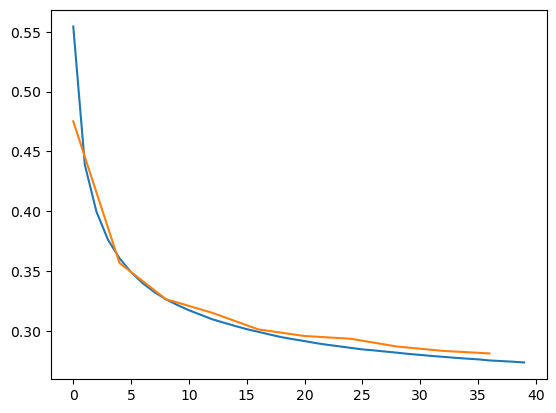

In [19]:
print(final_validation_size3.mean())
print(t_loss_size3.mean(axis=1)[-1])
plt.plot(t_loss_size3.mean(axis=1))
plt.plot(validation_base, v_loss_size3.mean(axis=1))

In [20]:
model_size4 = TransportModel(topology=[20,256,512,512,256,2])
model_size4.set_norm(norms)
final_validation_size4, t_loss_size4, v_loss_size4 = benchmark_model(model_size4)

Epoch 1 mean loss: 0.4421                   
Validation loss: 0.3288, median loss: 0.1331
Epoch 2 mean loss: 0.2948                   
Epoch 3 mean loss: 0.2506                   
Epoch 4 mean loss: 0.2254                   
Epoch 5 mean loss: 0.2084                   
Validation loss: 0.2113, median loss: 0.0693
Epoch 6 mean loss: 0.1965                   
Epoch 7 mean loss: 0.1872                   
Epoch 8 mean loss: 0.1796                   
Epoch 9 mean loss: 0.1733                   
Validation loss: 0.1830, median loss: 0.0583
Epoch 10 mean loss: 0.1680                   
Epoch 11 mean loss: 0.1634                   
Epoch 12 mean loss: 0.1593                   
Epoch 13 mean loss: 0.1557                   
Validation loss: 0.1716, median loss: 0.0535
Epoch 14 mean loss: 0.1524                   
Epoch 15 mean loss: 0.1493                   
Epoch 16 mean loss: 0.1467                   
Epoch 17 mean loss: 0.1441                   
Validation loss: 0.1622, median loss: 0.0508
Ep

0.14525121829210993
0.11474687925781439


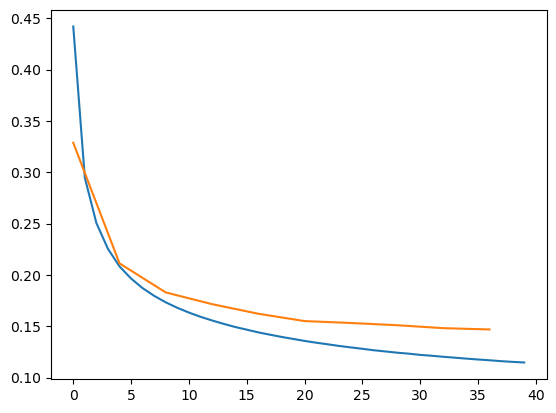

In [21]:
print(final_validation_size4.mean())
print(t_loss_size4.mean(axis=1)[-1])
plt.plot(t_loss_size4.mean(axis=1))
plt.plot(validation_base, v_loss_size4.mean(axis=1))

In [22]:
model_size5 = TransportModel(topology=[20,512,1024,1024,1024,512,2])
model_size5.set_norm(norms)
final_validation_size5, t_loss_size5, v_loss_size5 = benchmark_model(model_size5)

Epoch 1 mean loss: 0.4051                   
Validation loss: 0.2887, median loss: 0.1056
Epoch 2 mean loss: 0.2554                   
Epoch 3 mean loss: 0.2118                   
Epoch 4 mean loss: 0.1867                   
Epoch 5 mean loss: 0.1700                   
Validation loss: 0.1738, median loss: 0.0504
Epoch 6 mean loss: 0.1577                   
Epoch 7 mean loss: 0.1479                   
Epoch 8 mean loss: 0.1400                   
Epoch 9 mean loss: 0.1334                   
Validation loss: 0.1485, median loss: 0.0419
Epoch 10 mean loss: 0.1277                   
Epoch 11 mean loss: 0.1226                   
Epoch 12 mean loss: 0.1180                   
Epoch 13 mean loss: 0.1141                   
Validation loss: 0.1336, median loss: 0.0371
Epoch 14 mean loss: 0.1101                   
Epoch 15 mean loss: 0.1070                   
Epoch 16 mean loss: 0.1038                   
Epoch 17 mean loss: 0.1011                   
Validation loss: 0.1274, median loss: 0.0352
Ep

0.11490612061022029
0.06878395528750898


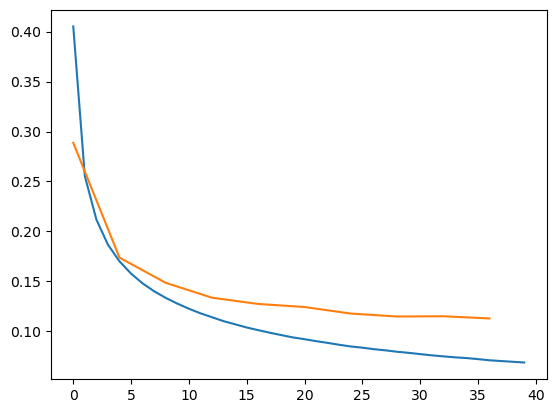

In [24]:
print(final_validation_size5.mean())
print(t_loss_size5.mean(axis=1)[-1])
plt.plot(t_loss_size5.mean(axis=1))
plt.plot(validation_base, v_loss_size5.mean(axis=1))

In [30]:
model_size6 = TransportModel(topology=[20,256,512,512,512,256,2])
model_size6.set_norm(norms)
final_validation_size6, t_loss_size6, v_loss_size6 = benchmark_model(model_size6)

Epoch 1 mean loss: 0.4204                   
Validation loss: 0.3119, median loss: 0.1163
Epoch 2 mean loss: 0.2728                   
Epoch 3 mean loss: 0.2310                   
Epoch 4 mean loss: 0.2076                   
Epoch 5 mean loss: 0.1913                   
Validation loss: 0.1945, median loss: 0.0603
Epoch 6 mean loss: 0.1797                   
Epoch 7 mean loss: 0.1701                   
Epoch 8 mean loss: 0.1627                   
Epoch 9 mean loss: 0.1564                   
Validation loss: 0.1695, median loss: 0.0519
Epoch 10 mean loss: 0.1509                   
Epoch 11 mean loss: 0.1464                   
Epoch 12 mean loss: 0.1421                   
Epoch 13 mean loss: 0.1385                   
Validation loss: 0.1564, median loss: 0.0461
Epoch 14 mean loss: 0.1351                   
Epoch 15 mean loss: 0.1320                   
Epoch 16 mean loss: 0.1293                   
Epoch 17 mean loss: 0.1269                   
Validation loss: 0.1478, median loss: 0.0432
Ep

0.13115175879304194
0.09792578920851092


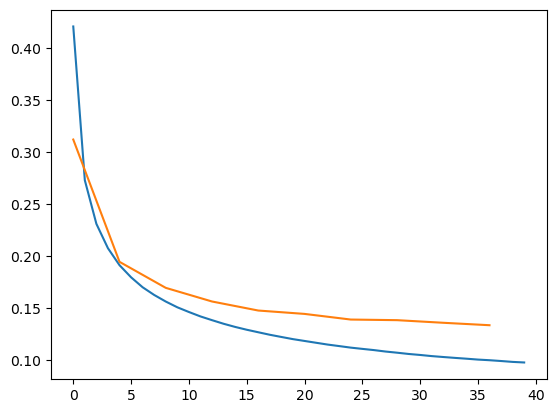

In [31]:
print(final_validation_size6.mean())
print(t_loss_size6.mean(axis=1)[-1])
plt.plot(t_loss_size6.mean(axis=1))
plt.plot(validation_base, v_loss_size6.mean(axis=1))

In [35]:
from time import perf_counter

start_model1 = perf_counter()
model_size1.train_epoch(train_dataloader, True)
time_size1 = perf_counter() - start_model1

start_model2 = perf_counter()
model_size2.train_epoch(train_dataloader, True)
time_size2 = perf_counter() - start_model2

start_model3 = perf_counter()
model_size3.train_epoch(train_dataloader, True)
time_size3 = perf_counter() - start_model3

start_model4 = perf_counter()
model_size4.train_epoch(train_dataloader, True)
time_size4 = perf_counter() - start_model4

start_model6 = perf_counter()
model_size6.train_epoch(train_dataloader, True)
time_size6 = perf_counter() - start_model6

start_model5 = perf_counter()
model_size5.train_epoch(train_dataloader, True)
time_size5 = perf_counter() - start_model5

Epoch progress: [1843712/1891170]

In [36]:
print(time_size1, time_size2, time_size3, time_size4, time_size6, time_size5)

9.422806223999942 10.589361157995882 13.99655400798656 38.2336706740025 51.77855750799063 172.00719621000462


In [32]:
model_broad = TransportModel(topology=[20,768,768,2])
model_broad.set_norm(norms)
final_broad, t_loss_broad, v_loss_broad = benchmark_model(model_broad)

Epoch 1 mean loss: 0.5018                   
Validation loss: 0.4141, median loss: 0.2053
Epoch 2 mean loss: 0.3879                   
Epoch 3 mean loss: 0.3480                   
Epoch 4 mean loss: 0.3220                   
Epoch 5 mean loss: 0.3032                   
Validation loss: 0.2994, median loss: 0.1235
Epoch 6 mean loss: 0.2884                   
Epoch 7 mean loss: 0.2772                   
Epoch 8 mean loss: 0.2676                   
Epoch 9 mean loss: 0.2592                   
Validation loss: 0.2648, median loss: 0.1056
Epoch 10 mean loss: 0.2525                   
Epoch 11 mean loss: 0.2463                   
Epoch 12 mean loss: 0.2409                   
Epoch 13 mean loss: 0.2361                   
Validation loss: 0.2458, median loss: 0.0951
Epoch 14 mean loss: 0.2320                   
Epoch 15 mean loss: 0.2278                   
Epoch 16 mean loss: 0.2243                   
Epoch 17 mean loss: 0.2211                   
Validation loss: 0.2322, median loss: 0.0905
Ep

0.1997078925078211
0.18100816343013956


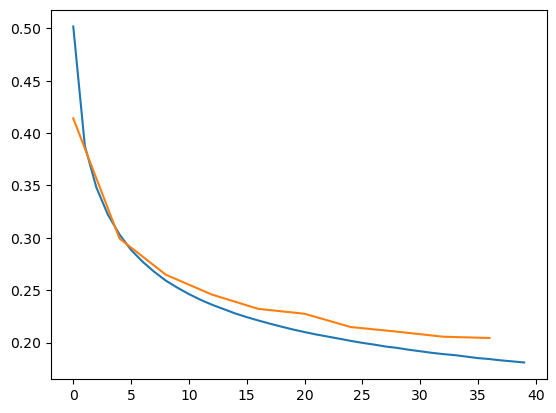

In [33]:
print(final_broad.mean())
print(t_loss_broad.mean(axis=1)[-1])
plt.plot(t_loss_broad.mean(axis=1))
plt.plot(validation_base, v_loss_broad.mean(axis=1))

In [37]:
model_square = TransportModel(topology=[20,384,384,384,384,2])
model_square.set_norm(norms)
final_square, t_loss_square, v_loss_square = benchmark_model(model_square)

Epoch 1 mean loss: 0.4519                   
Validation loss: 0.3428, median loss: 0.1445
Epoch 2 mean loss: 0.3026                   
Epoch 3 mean loss: 0.2563                   
Epoch 4 mean loss: 0.2314                   
Epoch 5 mean loss: 0.2151                   
Validation loss: 0.2147, median loss: 0.0722
Epoch 6 mean loss: 0.2035                   
Epoch 7 mean loss: 0.1942                   
Epoch 8 mean loss: 0.1868                   
Epoch 9 mean loss: 0.1806                   
Validation loss: 0.1918, median loss: 0.0626
Epoch 10 mean loss: 0.1753                   
Epoch 11 mean loss: 0.1705                   
Epoch 12 mean loss: 0.1664                   
Epoch 13 mean loss: 0.1628                   
Validation loss: 0.1769, median loss: 0.0562
Epoch 14 mean loss: 0.1595                   
Epoch 15 mean loss: 0.1567                   
Epoch 16 mean loss: 0.1539                   
Epoch 17 mean loss: 0.1515                   
Validation loss: 0.1690, median loss: 0.0543
Ep

In [44]:
print(final_square.mean())
print(t_loss_square.mean(axis=1)[-1])

0.1501379028757156
0.12405728607659863


In [38]:
model_slim = TransportModel(topology=[20,192,192,192,192,192,192,192,192,2])
model_slim.set_norm(norms)
final_slim, t_loss_slim, v_loss_slim = benchmark_model(model_slim)

Epoch 1 mean loss: 0.4562                   
Validation loss: 0.3443, median loss: 0.1430
Epoch 2 mean loss: 0.3145                   
Epoch 3 mean loss: 0.2777                   
Epoch 4 mean loss: 0.2565                   
Epoch 5 mean loss: 0.2419                   
Validation loss: 0.2422, median loss: 0.0831
Epoch 6 mean loss: 0.2312                   
Epoch 7 mean loss: 0.2226                   
Epoch 8 mean loss: 0.2155                   
Epoch 9 mean loss: 0.2102                   
Validation loss: 0.2151, median loss: 0.0713
Epoch 10 mean loss: 0.2052                   
Epoch 11 mean loss: 0.2011                   
Epoch 12 mean loss: 0.1973                   
Epoch 13 mean loss: 0.1942                   
Validation loss: 0.2054, median loss: 0.0662
Epoch 14 mean loss: 0.1913                   
Epoch 15 mean loss: 0.1885                   
Epoch 16 mean loss: 0.1861                   
Epoch 17 mean loss: 0.1839                   
Validation loss: 0.1997, median loss: 0.0629
Ep

In [45]:
print(final_slim.mean())
print(t_loss_slim.mean(axis=1)[-1])

0.17624718101018666
0.15770713773187459


In [39]:
model_bottleneck = TransportModel(topology=[20,448,128,64,128,448,2])
model_bottleneck.set_norm(norms)
final_bottleneck, t_loss_bottleneck, v_loss_bottleneck = benchmark_model(model_bottleneck)

Epoch 1 mean loss: 0.4869                   
Validation loss: 0.3901, median loss: 0.1720
Epoch 2 mean loss: 0.3596                   
Epoch 3 mean loss: 0.3210                   
Epoch 4 mean loss: 0.2979                   
Epoch 5 mean loss: 0.2821                   
Validation loss: 0.2858, median loss: 0.1119
Epoch 6 mean loss: 0.2705                   
Epoch 7 mean loss: 0.2608                   
Epoch 8 mean loss: 0.2531                   
Epoch 9 mean loss: 0.2470                   
Validation loss: 0.2485, median loss: 0.0875
Epoch 10 mean loss: 0.2415                   
Epoch 11 mean loss: 0.2369                   
Epoch 12 mean loss: 0.2323                   
Epoch 13 mean loss: 0.2290                   
Validation loss: 0.2367, median loss: 0.0811
Epoch 14 mean loss: 0.2252                   
Epoch 15 mean loss: 0.2224                   
Epoch 16 mean loss: 0.2199                   
Epoch 17 mean loss: 0.2172                   
Validation loss: 0.2249, median loss: 0.0771
Ep

In [46]:
print(final_bottleneck.mean())
print(t_loss_bottleneck.mean(axis=1)[-1])

0.20506148496320345
0.19043395374198185


In [40]:
model_diamond = TransportModel(topology=[20,64,384,640,384,64,2])
model_diamond.set_norm(norms)
final_diamond, t_loss_diamond, v_loss_diamond = benchmark_model(model_diamond)

Epoch 1 mean loss: 0.4620                   
Validation loss: 0.3429, median loss: 0.1450
Epoch 2 mean loss: 0.3033                   
Epoch 3 mean loss: 0.2554                   
Epoch 4 mean loss: 0.2292                   
Epoch 5 mean loss: 0.2116                   
Validation loss: 0.2114, median loss: 0.0686
Epoch 6 mean loss: 0.1987                   
Epoch 7 mean loss: 0.1888                   
Epoch 8 mean loss: 0.1806                   
Epoch 9 mean loss: 0.1737                   
Validation loss: 0.1858, median loss: 0.0577
Epoch 10 mean loss: 0.1683                   
Epoch 11 mean loss: 0.1630                   
Epoch 12 mean loss: 0.1587                   
Epoch 13 mean loss: 0.1548                   
Validation loss: 0.1707, median loss: 0.0526
Epoch 14 mean loss: 0.1513                   
Epoch 15 mean loss: 0.1482                   
Epoch 16 mean loss: 0.1452                   
Epoch 17 mean loss: 0.1427                   
Validation loss: 0.1628, median loss: 0.0497
Ep

In [47]:
print(final_diamond.mean())
print(t_loss_diamond.mean(axis=1)[-1])

0.14693214044062997
0.11221738519478826


In [41]:
model_taper = TransportModel(topology=[20,828,448,196,64,2])
model_taper.set_norm(norms)
final_taper, t_loss_taper, v_loss_taper = benchmark_model(model_taper)

Epoch 1 mean loss: 0.4695                   
Validation loss: 0.3675, median loss: 0.1601
Epoch 2 mean loss: 0.3277                   
Epoch 3 mean loss: 0.2829                   
Epoch 4 mean loss: 0.2568                   
Epoch 5 mean loss: 0.2389                   
Validation loss: 0.2361, median loss: 0.0843
Epoch 6 mean loss: 0.2258                   
Epoch 7 mean loss: 0.2156                   
Epoch 8 mean loss: 0.2073                   
Epoch 9 mean loss: 0.2008                   
Validation loss: 0.2095, median loss: 0.0705
Epoch 10 mean loss: 0.1947                   
Epoch 11 mean loss: 0.1896                   
Epoch 12 mean loss: 0.1851                   
Epoch 13 mean loss: 0.1815                   
Validation loss: 0.1930, median loss: 0.0632
Epoch 14 mean loss: 0.1778                   
Epoch 15 mean loss: 0.1745                   
Epoch 16 mean loss: 0.1716                   
Epoch 17 mean loss: 0.1688                   
Validation loss: 0.1822, median loss: 0.0587
Ep

In [48]:
print(final_taper.mean())
print(t_loss_taper.mean(axis=1)[-1])

0.16026815735365707
0.13649524160992085


In [42]:
model_expand = TransportModel(topology=[20,64,196,448,828,2])
model_expand.set_norm(norms)
final_expand, t_loss_expand, v_loss_expand = benchmark_model(model_expand)

Epoch 1 mean loss: 0.4785                   
Validation loss: 0.3765, median loss: 0.1693
Epoch 2 mean loss: 0.3335                   
Epoch 3 mean loss: 0.2845                   
Epoch 4 mean loss: 0.2577                   
Epoch 5 mean loss: 0.2398                   
Validation loss: 0.2372, median loss: 0.0820
Epoch 6 mean loss: 0.2264                   
Epoch 7 mean loss: 0.2158                   
Epoch 8 mean loss: 0.2073                   
Epoch 9 mean loss: 0.2000                   
Validation loss: 0.2072, median loss: 0.0703
Epoch 10 mean loss: 0.1942                   
Epoch 11 mean loss: 0.1887                   
Epoch 12 mean loss: 0.1842                   
Epoch 13 mean loss: 0.1801                   
Validation loss: 0.1936, median loss: 0.0658
Epoch 14 mean loss: 0.1763                   
Epoch 15 mean loss: 0.1732                   
Epoch 16 mean loss: 0.1701                   
Epoch 17 mean loss: 0.1674                   
Validation loss: 0.1863, median loss: 0.0625
Ep

In [49]:
print(final_expand.mean())
print(t_loss_expand.mean(axis=1)[-1])

0.16728346906809693
0.13678389754192727


In [50]:
model_epoch_test = TransportModel(topology=[20,256,512,512,256,2])
model_epoch_test.set_norm(norms)

In [51]:
train_loss = []
validation_loss = []
for epoch in range(60):
    epoch_loss = model_epoch_test.train_epoch(train_dataloader, True)
    train_loss.append(epoch_loss)
    print(f"\rEpoch {epoch+1} mean loss: {epoch_loss.mean():<25.4f}")
    epoch_validation_loss = model_epoch_test.validate(test_dataloader)
    validation_loss.append(epoch_validation_loss)
    print(f"\rValidation loss: {epoch_validation_loss.mean():.4f}, median loss: {np.median(epoch_validation_loss):.4f}")

Epoch 1 mean loss: 0.4446                   
Validation loss: 0.3344, median loss: 0.1388
Epoch 2 mean loss: 0.2984                   
Validation loss: 0.2711, median loss: 0.0979
Epoch 3 mean loss: 0.2532                   
Validation loss: 0.2419, median loss: 0.0840
Epoch 4 mean loss: 0.2282                   
Validation loss: 0.2264, median loss: 0.0763
Epoch 5 mean loss: 0.2112                   
Validation loss: 0.2111, median loss: 0.0686
Epoch 6 mean loss: 0.1986                   
Validation loss: 0.2021, median loss: 0.0653
Epoch 7 mean loss: 0.1891                   
Validation loss: 0.1948, median loss: 0.0634
Epoch 8 mean loss: 0.1816                   
Validation loss: 0.1882, median loss: 0.0607
Epoch 9 mean loss: 0.1750                   
Validation loss: 0.1878, median loss: 0.0615
Epoch 10 mean loss: 0.1693                   
Validation loss: 0.1807, median loss: 0.0584
Epoch 11 mean loss: 0.1646                   
Validation loss: 0.1777, median loss: 0.0555
Epoch 12

In [52]:
model_epoch_test.save("model_epoch_test")

In [54]:
mean_t_loss = np.array(train_loss).mean(axis=1)
std_t_loss =  np.array(train_loss).std(axis=1)
mean_v_loss = np.array(validation_loss).mean(axis=1)
std_v_loss =  np.array(validation_loss).std(axis=1)

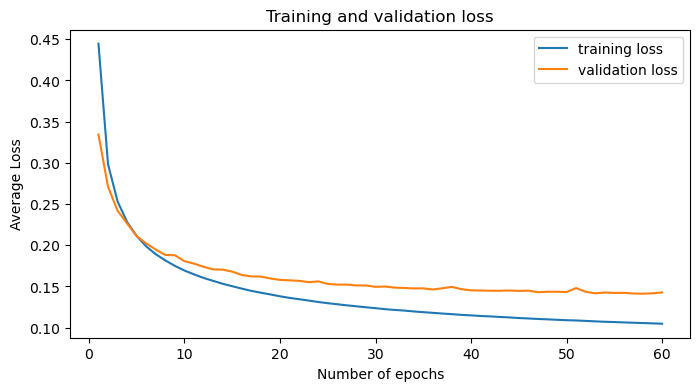

In [70]:
plt.figure(figsize=(8,4))
plt.plot(range(1,61), mean_t_loss, label="training loss")
plt.plot(range(1,61), mean_v_loss, label="validation loss")
plt.ylabel("Average Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.title("Training and validation loss")
plt.savefig("../Thesis/Chapters/4-Implementation/img/training_loss.png")

In [71]:
np.array(validation_loss).shape

(60, 210131)